In [119]:
import matplotlib
matplotlib.use('Qt5Agg') #changed GTKAgg to TkAgg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

In [120]:
data1 = pd.read_csv("data1.csv")
mydata = data1.to_numpy()
mydata

array([[1.000e+00, 1.038e+01, 3.001e-01, 1.000e+00],
       [2.000e+00, 1.777e+01, 8.690e-02, 1.000e+00],
       [3.000e+00, 2.125e+01, 1.974e-01, 1.000e+00],
       ...,
       [5.670e+02, 2.808e+01, 9.251e-02, 1.000e+00],
       [5.680e+02, 2.933e+01, 3.514e-01, 1.000e+00],
       [5.690e+02, 2.454e+01, 0.000e+00, 0.000e+00]])

In [121]:
#new method

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('data1.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 49)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [124]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [125]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


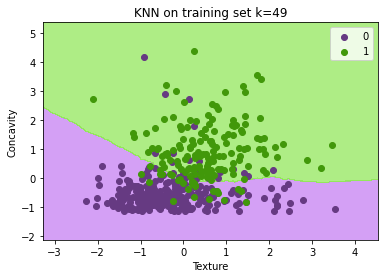

In [126]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c680f2', '#93e85c')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#663a82', '#41980a'))(i), label = j)
plt.title('KNN on training set k=49')
plt.xlabel('Texture')
plt.ylabel('Concavity')
plt.legend()
plt.show()

In [90]:
#method 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mynames = ['n', 'texture', 'concavity', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("data1.csv")

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59  9]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        68
           1       0.82      0.91      0.87        46

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



In [92]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 180):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

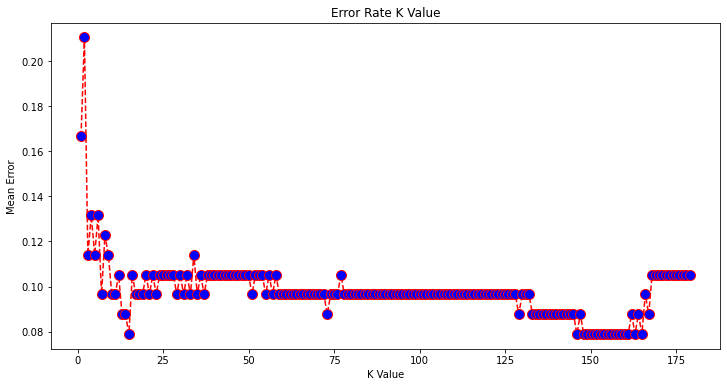

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 180), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
#Linear Regression: